This notebook looks at an underground project with two circuits and ways to potentially reduce the magnetic fields. Underground lines are often housed closely together in duct banks which arrange the conductors into a grid. Here we imagine a 3x3 duct bank with half-foot spacing between the slots, about 3 feet below the ground.
* The first arrangement we test has the conductors in each circuit stacked vertically on the edges of the grid.
* Next, we'll put the conductors into the corner of the grid. This is expected to reduce fields because the conductors of each circuit will be closer together, if only a little. Because of their phase offsets, if all three conductors of a single circuit were somehow in the same location, the fields would cancel to zero because the net current would be zero. So, moving the conductors of each circuit closer together generally helps to reduce fields.
* Finally, we'll use the phase optimization algorithm on the "cornered" arrangement and see how much the fields can be reduced simply by choosing the location of each phase wisely, without any other rearrangement.

In [1]:
import emf.fields as fld
#special command for the notebook to show plots inline
%matplotlib inline 

In [2]:
#create the first Conductor object
c1 = fld.Conductor('1a', dict(x=-.5, y=-3, d_cond=1, V=345, I=247, phase=0))
print(c1)

  Conductor object
    name:                    '1a'
    parent CrossSection:     None
    frequency (Hz):          60.0
    x coordinate (ft):       -0.5
    y coordinate (ft):       -3.0
    subconductors:           1
    conductor diameter (in): 1.0
    bundle diameter (in):    1.0
    voltage (V):             345.0
    current (I):             247.0
    phase angle (deg):       0.0


In [3]:
#create the next two Conductors in the circuit by copying most
#of the variables from the first conductor
c2 = fld.Conductor('1b', {'y': -3.5, 'phase': 120}, c1)
c3 = fld.Conductor('1c', {'y': -4, 'phase': 240}, c1)

In [4]:
#put the first circuit into a CrossSection and set some of the
# CrossSection's modeling and identification parameters
xs = fld.CrossSection('vertical', [c1, c2, c3])
xs.group = 'Underground Lines'
xs.title = 'Vertical Configuration'
xs.max_dist = 30
xs.lROW = -15
xs.rROW = 10

In [5]:
#now add the second circuit and print out the CrossSection to make sure things are correct
xs.add_conductor(fld.Conductor('2a', dict(x=0.5, y=-3, phase=0), c3))
xs.add_conductor(fld.Conductor('2b', dict(x=0.5, y=-3.5, phase=120), c3))
xs.add_conductor(fld.Conductor('2c', dict(x=0.5, y=-4, phase=240), c3))

print(xs)

  CrossSection object

    sheet:                         vertical
    parent SectionBook:            None
    group:                         Underground Lines
    title:                         Vertical Configuration
    soil resistivity (?):          100.0
    max distance from center (ft): 30.0
    step size (ft):                1.0
    sample height (ft):            3.0
    left ROW edge (ft):            -15.0
    right ROW edge (ft):           10.0

    conductor information (6 Conductors)
      names:                 '1a', '1b', '1c', '2a', '2b', '2c'
      frequencies (Hz):      60.0, 60.0, 60.0, 60.0, 60.0, 60.0
      x coordinates (ft):    -0.5, -0.5, -0.5, 0.5, 0.5, 0.5
      y coordinates (ft):    -3.0, -3.5, -4.0, -3.0, -3.5, -4.0
      subconductors:         1.0, 1.0, 1.0, 1.0, 1.0, 1.0
      diameters (in):        1.0, 1.0, 1.0, 1.0, 1.0, 1.0
      bundle diameters (in): 1.0, 1.0, 1.0, 1.0, 1.0, 1.0
      voltages (V):          345.0, 345.0, 345.0, 345.0, 345.0, 345.0
   

In [6]:
#add the CrossSection to a SectionBook in anticipation of more CrossSections for
#the "cornered" arrangement, then print the SectionBook just to check it out
sb = fld.SectionBook('underground-line-optimization', [xs])

print(sb)

  SectionBook object
      name:          'underground-line-optimization'
      sheets:        'vertical'
      unique groups: 'Underground Lines'

    maximum fields at CrossSection ROW edges:
                    Bmaxl      Bmaxr  Emaxl  Emaxr
      vertical  10.517718  19.764416    0.0    0.0


In [7]:
#when a CrossSection gets added to a SectionBook, the SectionBook stores a copy.
#So, the CrossSection in our 'xs' variable is distinct from the one in our SectionBook.
#We can edit the 'xs' variable to create the "cornered" arrangement, then add it
#to the SectionBook. The SectionBook will have stored two copies of the 'xs' variable,
#copied at the time its add_section() method was run.
xs['1a'].y -= .5
xs['1b'].y -= .5
xs['1c'].x += .5
xs['2a'].x -= .5
xs['2b'].y += .5
xs['2c'].y += .5
xs.title = 'Cornered Configuration'
xs.sheet = 'cornered'
sb.add_section(xs)

print(sb)

  SectionBook object
      name:          'underground-line-optimization'
      sheets:        'vertical', 'cornered'
      unique groups: 'Underground Lines'

    maximum fields at CrossSection ROW edges:
                    Bmaxl      Bmaxr  Emaxl  Emaxr
      vertical  10.517718  19.764416    0.0    0.0
      cornered   7.430379  13.978037    0.0    0.0


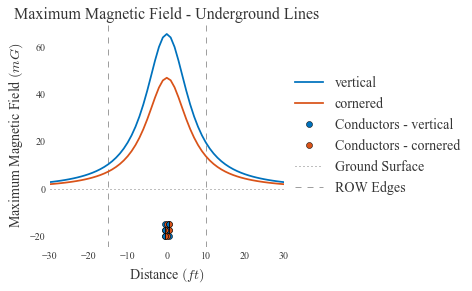

In [8]:
fld.plot_groups(sb, return_figs=True, E=False)
fld.show()

In [9]:
#phase optimization returns two variables
#the first is a DataFrame listing the optimal phasing
#the second is a SectionBook with the original CrossSection and
# CrossSections for each optimization goal
# (You can optimize for the magnetic and electric fields at both ROW edges,
#  so there are 4 optimizations done each time optimize_phasing() is called.)
res, opt = fld.optimize_phasing(sb['cornered'], 'all', save=True)

print(opt)
print(sb.unique_group_names)

Phase optimization results written to: cornered_phase_optimization.xlsx
  SectionBook object
      name:          'cornered-optimal_phasing'
      sheets:        'cornered (original)', 'Optimized for Bmax left',
                     'Optimized for Bmax right', 'Optimized for Emax
                     left', 'Optimized for Emax right'
      unique groups: 'Phase Optimized'

    maximum fields at CrossSection ROW edges:
                                   Bmaxl      Bmaxr  Emaxl  Emaxr
      cornered (original)       7.430379  13.978037    0.0    0.0
      Optimized for Bmax left   0.370336   0.959136    0.0    0.0
      Optimized for Bmax right  0.370336   0.959136    0.0    0.0
      Optimized for Emax left   7.430379  13.978037    0.0    0.0
      Optimized for Emax right  7.430379  13.978037    0.0    0.0
set(['Underground Lines'])


In [10]:
#Both magnetic field optimizations are the same
#pull out one of them and add it to our original SectionBook
# so that we can make comparisons
xs = opt.i[1]
xs.sheet = 'optimized cornered'
xs.title = 'Cornered Configuration, Phase Optimized'
xs.group = 'Underground Lines'
sb.add_section(xs)

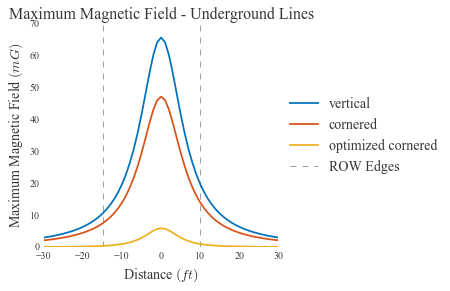

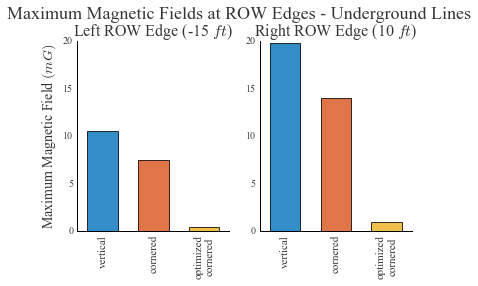

In [11]:
fld.plot_groups(sb, return_figs=True, E=False)
fld.plot_groups_at_ROW(sb, return_figs=True, E=False)
fld.show()

In [12]:
#take a look at the modeled maximum fields at the ROW edges of
# each CrossSection in the SectionBook
print(fld.sb_xs_compare(sb, 'optimized cornered')[1])

                       Bmaxl     Bmaxr  Emaxl  Emaxr
vertical            0.964789  0.951472    NaN    NaN
cornered            0.950159  0.931383    NaN    NaN
optimized cornered  0.000000  0.000000    NaN    NaN


About 95 % reduction in magnetic fields at both ROW edges after cornering and phase optimization!

In [13]:
#inspect the actual phasing assignments
print(res)

    Optimal Phasing - Bmax Left ROW Edge  \
1a                                 240.0   
1b                                 120.0   
1c                                   0.0   
2a                                   0.0   
2b                                 120.0   
2c                                 240.0   

    Optimal Phasing - Bmax Right ROW Edge  \
1a                                  120.0   
1b                                    0.0   
1c                                  240.0   
2a                                  240.0   
2b                                    0.0   
2c                                  120.0   

    Optimal Phasing - Emax Left ROW Edge  \
1a                                   0.0   
1b                                 120.0   
1c                                 240.0   
2a                                   0.0   
2b                                 120.0   
2c                                 240.0   

    Optimal Phasing - Emax Right ROW Edge  
1a                    

In [14]:
#export the optimized cornered xs to a FLD file to compare with FIELDS calcs
fld.to_FLD(sb['optimized cornered'])

FLD file generated: optimized cornered.FLD


plot saved to: optimized cornered-FIELDS-comparison-Bmax.png
plot saved to: optimized cornered-FIELDS-comparison-Emax.png
DAT comparison book saved to: optimized cornered-DAT-comparison.xlsx


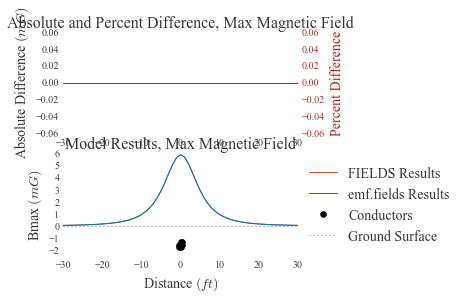

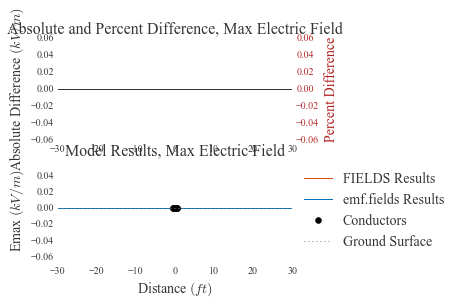

In [15]:
#after running the FLD file through FIELDS to generate a DAT file, compare the results
pan = sb['optimized cornered'].compare_DAT('optimized cornered.DAT', save=True, round=3)

No difference between the emf.fields and FIELDS output!

In [16]:
#After rounding the Python generated fields to the thousandths digit, they are identical to
#the FIELDS generated results. Zero absolute difference. Export the precise results.
sb['optimized cornered'].export()

Cross section fields written to: optimized cornered-all_results.csv
